# Histogramas

Un histograma simple puede ser un excelente primer paso para comprender un conjunto de datos.
Anteriormente, vimos una vista previa de la función de histograma de Matplotlib, que crea un histograma básico en una línea, una vez que se realizan las importaciones normales de texto estándar:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-white')

data = np.random.randn(1000)

In [3]:
data

array([-2.46209478e-01, -4.05752899e-02, -2.70067303e+00, -7.90976870e-01,
       -7.59468079e-01, -2.84017998e+00, -3.12513523e-01,  5.72897518e-01,
        8.78564274e-01,  1.41758921e+00, -6.12480385e-01, -1.18566568e+00,
        6.79169626e-01,  8.10386040e-02, -2.35768131e+00, -1.00653951e+00,
        1.88239911e+00,  2.26032418e-01, -9.07266971e-01,  2.53544783e-01,
        1.80575730e+00, -1.28065024e-02,  2.12416617e-01, -1.31591859e+00,
        1.50924274e+00, -1.27233869e+00,  2.74714029e-02, -7.14488710e-01,
        1.03620247e+00,  1.31596947e+00,  4.48228064e-01, -7.37333661e-01,
        1.32410349e+00,  3.09451026e-02, -5.95037819e-01, -1.33709853e+00,
       -1.55260402e-01,  5.73121941e-02,  3.13334518e-01,  8.66026880e-01,
        2.16520234e+00, -3.61999552e-01, -1.42364083e+00, -7.14184025e-01,
        3.18655562e-01, -8.30945841e-01, -1.47295510e+00, -1.54597952e+00,
       -1.18412483e+00, -1.44357009e-01, -1.30112389e+00,  4.93729096e-01,
       -5.13366297e-01,  

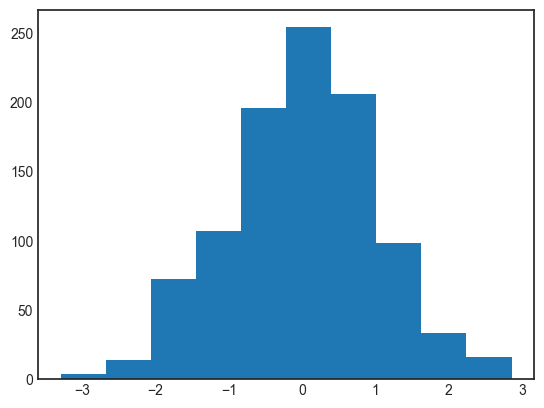

In [4]:
plt.hist(data);

In [5]:
counts, bin_edges = np.histogram(data, bins=10)
print(counts)
print(bin_edges)

[  4  14  72 107 196 254 206  98  33  16]
[-3.29630432 -2.68110812 -2.06591192 -1.45071572 -0.83551952 -0.22032332
  0.39487289  1.01006909  1.62526529  2.24046149  2.85565769]


In [6]:
display(min(data), max(data), max(data)-min(data), (max(data)-min(data))/10)

inter = (max(data)-min(data))/10
print(min(data), min(data)+inter,min(data)+2*inter,min(data)+3*inter, min(data)+4*inter, min(data)+5*inter,
        min(data)+6*inter, min(data)+7*inter, min(data)+8*inter, min(data)+9*inter, min(data)+10*inter)

-3.296304324599283

2.8556576916604857

6.151962016259769

0.6151962016259769

-3.296304324599283 -2.6811081229733063 -2.0659119213473294 -1.4507157197213525 -0.8355195180953756 -0.22032331646939873 0.39487288515657815 1.0100690867825546 1.625265288408532 2.2404614900345092 2.8556576916604857


La función ``hist()`` tiene muchas opciones para ajustar tanto el cálculo como la visualización;
Aquí hay un ejemplo de un histograma más personalizado:

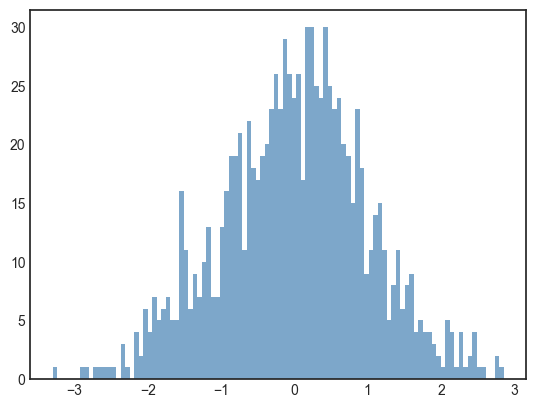

In [7]:
plt.hist(data,
         bins = 100,
        alpha = 0.7,
        color = 'steelblue');

La documentación ``plt.hist`` tiene más información sobre otras opciones de personalización disponibles.
La transparencia ``alpha`` es muy útil al comparar histogramas de varias distribuciones:

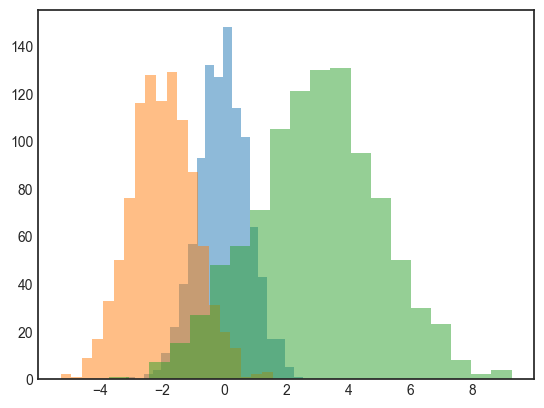

In [8]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(alpha = 0.5, bins = 20)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

Si desea simplemente calcular el histograma (es decir, contar el número de puntos en una sección/bin determinada) y no mostrarlo, la función ``np.histogram()`` está disponible:

In [9]:
counts, bin_edges = np.histogram(data, bins=10)
print(counts)

[  4  14  72 107 196 254 206  98  33  16]


In [10]:
bin_edges

array([-3.29630432, -2.68110812, -2.06591192, -1.45071572, -0.83551952,
       -0.22032332,  0.39487289,  1.01006909,  1.62526529,  2.24046149,
        2.85565769])

## Histogramas bidimensionales y binnings

Así como creamos histogramas en una dimensión dividiendo la recta numérica en secciones/bins, también podemos crear histogramas en dos dimensiones dividiendo puntos entre secciones/bins bidimensionales.
Aquí veremos brevemente varias formas de hacer esto.
Comenzaremos definiendo algunos datos: una matriz ``x`` e ``y`` extraída de una distribución gaussiana multivariada:

In [11]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

### ``plt.hist2d``: histograma bidimensional

Una forma sencilla de trazar un histograma bidimensional es utilizar la función ``plt.hist2d`` de Matplotlib:

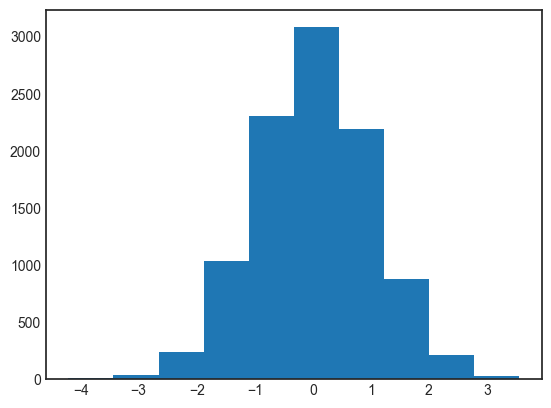

In [12]:
plt.hist(x);

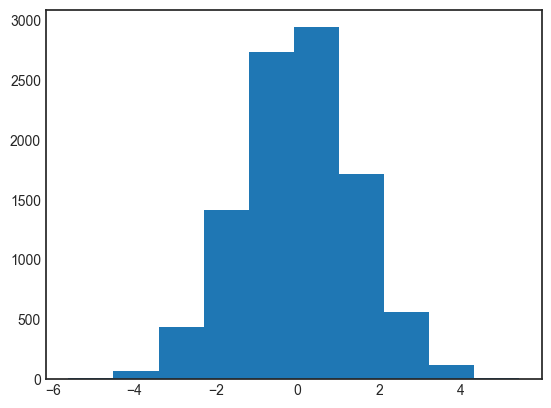

In [13]:
plt.hist(y);

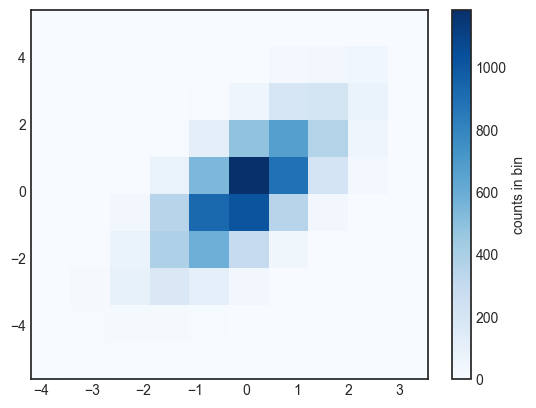

In [24]:
plt.hist2d(x, y, bins = 10, cmap = 'Blues');
cb = plt.colorbar() # paleta de colores
cb.set_label('counts in bin');

Al igual que con ``plt.hist``, ``plt.hist2d`` tiene una serie de opciones adicionales para ajustar la gráfica y el agrupamiento, que están muy bien definidas en la documentación de la función.
Además, así como ``plt.hist`` tiene una contraparte en ``np.histogram``, ``plt.hist2d`` tiene una contraparte en ``np.histogram2d``, que puede usarse de la siguiente manera:

In [21]:
counts, xedges, yedges = np.histogram2d(x, y, bins=10)

In [25]:
display(xedges, yedges, counts)

array([-4.21079736, -3.4339441 , -2.65709084, -1.88023757, -1.10338431,
       -0.32653104,  0.45032222,  1.22717549,  2.00402875,  2.78088201,
        3.55773528])

array([-5.61931543, -4.51435228, -3.40938914, -2.30442599, -1.19946284,
       -0.09449969,  1.01046345,  2.1154266 ,  3.22038975,  4.3253529 ,
        5.43031604])

array([[2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.000e+00, 8.000e+00, 1.600e+01, 9.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [3.000e+00, 2.100e+01, 9.300e+01, 8.200e+01, 3.500e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.200e+01, 1.740e+02, 3.890e+02, 3.530e+02, 8.700e+01,
        7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 1.100e+01, 1.140e+02, 5.880e+02, 9.270e+02, 5.390e+02,
        1.160e+02, 8.000e+00, 1.000e+00, 0.000e+00],
       [0.000e+00, 1.000e+00, 3.900e+01, 2.970e+02, 1.019e+03, 1.186e+03,
        4.850e+02, 5.300e+01, 2.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, 4.700e+01, 3.560e+02, 8.870e+02,
        6.760e+02, 1.970e+02, 2.600e+01, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 3.700e+01, 2.090e+02,
        3.690e+02, 2.150e+02, 3.700e+

Para conocer la generalización de este histograma agrupado en dimensiones superiores a dos, consulte la función ``np.histogramdd``.

### ``plt.hexbin``: secciones/bins hexagonales

El histograma bidimensional crea un mosaico de cuadrados a lo largo de los ejes.
Otra forma natural para este tipo de mosaico es el hexágono regular.
Para este propósito, Matplotlib proporciona la rutina ``plt.hexbin``, que representará un conjunto de datos bidimensional agrupado dentro de una cuadrícula de hexágonos:

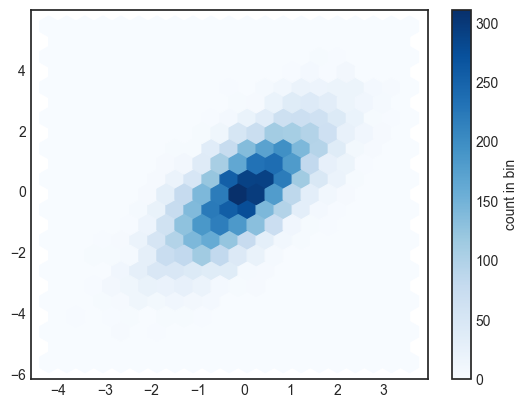

In [23]:
plt.hexbin(x, y, gridsize = 20, cmap = 'Blues')
cb = plt.colorbar(label='count in bin');

``plt.hexbin`` tiene varias opciones interesantes, incluida la capacidad de especificar pesos para cada punto y cambiar la salida en cada sección/bin a cualquier agregado NumPy (media ponderada, desviación estándar ponderada, etc.).